## <center>TensorFlow2.x基础</center>

## 目录
    1、测试TensorFlow2.0
    2、TensorFlow2.x的默认运行模式——动态图（Eager）
    3、TensorFlow2.x 中切换为 1.x运行模式
    4、张量（Tensor）
    5、常见的Tensor运算
    6、常量和变量
    7、自动求导机制

## 预备知识
在学习本实验之前，我们可能需要具备一些基本的预备知识，如：
- Python的基本操作，基本的书写规范、数据类型、赋值、分支和循环语句、使用import导入库
- Numpy，了解一些Numpy的相关知识，例如array类型
- 了解向量和矩阵的相关运算：加法、减法、矩阵向量相乘，矩阵与矩阵相乘，矩阵的转置等
- 模型训练的相关知识，理解正反向传播的原理和流程。正向传播，计算实际输出，对比期望输出（label），得到误差值，反向传播，将误差分摊到网络各层，得到误差最小时，网络对应的参数。

## 综述
TensorFlow是一个非常优秀的深度学习框架，在2015年11月9日正式开源，从零点几版本开始，又到TensorFlow1.x版本，期间经过了三年的迭代，在2019年3月，TensorFlow团队宣布正式开启2.0版本。TensorFlow2.0在TensoFlow1.x版本上进行了大规模的改进，主要有以下几点：

- 将“动态图（Eager）”作为TensorFlow的默认运行方式，不需要构建会话就可以直接返回结果。
- 删除了tf.contrib库，加个tf.contrib库下面的高阶API都整合到了tf.keras下。
- 将TensorFlow中很多重复的API进行合并。
- 删除了全局变量

## 基础知识

### 1、测试TensorFlow2.0

#### 代码1-1：导入TensorFlow并打印其版本

In [ ]:
import tensorflow as tf
tf.__version__ #打印TensorFlow的版本

### 2.TensorFlow2.x的默认运行模式——动态图（Eager）*

TensorFlow2.x下，Eager是默认的运行形式，不需要手动开启。我们用类似Python的用法就可以打印出Tensor的值。而在 TensorFlow 1.X 版本中， 必须在导入 TensorFlow 库后调用 tf.enable_eager_execution() 函数以启用即时执行模式。

#### 代码2-1：使用TF2.x直接打印张量的值。

In [ ]:
import tensorflow as tf
a = tf.constant(2.0)
print(a)

在代码中，TF2.x默认启用了Eager模式，在读入了tf常量后，将结果打印了下来。这里打印了读入数据后的Tensor，包括他的具体数值，维度大小、数据类型。

### 3、TensorFlow2.x 中<font color=red> 切换为 1.x运行模式</font>

TensorFlow2.x在1.x的基础有很大的变动，删除了原本1.x版本中很多功能存在冗余的模块，例如tf.contrib库。对于在tf1.0下编写的代码，直接拿到2.x中，可能会出现一些问题。所以如果我们想解决这个问题，我们可能就需要重新引入TensorFlow1.x的运行模式。只要在调用的时候加上如下代码即可：

<font color=red>  
import tensorflow.compat.v1 as tf
    
tf.disable_v2_behavior()
    
</font>
    
#### 代码3-1：切换为1.x运行模式后，直接打印Tensor

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
a = tf.constant(2.0)
print(a)

通过代码3-1可以发现，在TF2.x切换成1.x的运行模式后，TensorFlow的使用和1.x就没有什么区别，代码中不再具备2.x版本中的一些使用特性。

#### 代码3-2:.切换为1.x模式后，通过在会话中运行Tensor，打印结果

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
a = tf.constant(2.0)
with tf.Session() as sess:
    print(sess.run(a))

### 4、张量（Tensor）*

TensorFlow 程序使用 tensor 数据结构来代表所有的数据, 计算图中, 操作间传递的数据都是 tensor。我们可以把 TensorFlow tensor 看作是一个 n 维的数组或列表。在TF2.x中，张量的形状、类型和值可以通过<font color=red>shape，dtype，numpy()</font>方法获得。

#### Tensor的3个重要属性
#### 代码4-1:打印2.x中张量的形状、类型、数值

In [ ]:
import tensorflow as tf
a = tf.constant([[1.0,2.0],[3.0,4.0]])
a

In [ ]:
print(a.shape)
print(a.dtype)
print(a.numpy())

#### （1）形状（shape）
#### 代码4-2：理解Tensor的shape

In [ ]:
import tensorflow as tf
tensor1 = tf.constant(22)
tensor2 = tf.constant([1,2,3])
tensor3 = tf.constant([[1,2],[3,4]])
tensor4 = tf.constant([[[1],[2],[3]]])
print("张量           ","形状")
print("22：             ",tensor1.shape)
print("[1,2,3]：        ",tensor2.shape)
print("[[1,2],[3,4]]：  ",tensor3.shape)
print("[[[1],[2],[3]]]：",tensor4.shape)

#### （2）类型（dtype）
TensorFlow 的大多数 API 函数会根据输入的值自动推断张量中元素的类型（一般默认为 tf.float32 ）。不过我们也可以加入 dtype 参数来自行指定类型。
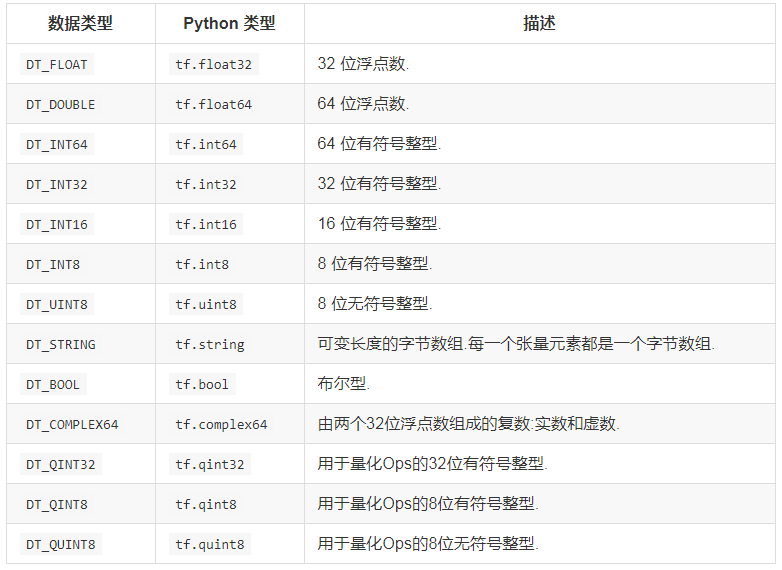
#### 代码4-3：指定Tensor类型

In [ ]:
import tensorflow as tf
a = tf.zeros(shape=(3), dtype=tf.bool)
b = tf.constant(356,dtype=tf.float32)
print(a)
print(b)

这里用dtype，强制将整型转成布尔型，将整型转为浮点型。

#### 代码4-4：TF中各种格式数据的表现形式

In [ ]:
import tensorflow as tf
tensor1 = tf.constant(22)
tensor2 = tf.constant(2233333333)
tensor3 = tf.constant(1.0)
tensor4 = tf.constant(True)
tensor5 = tf.constant("hello world")
print(tensor1.dtype)
print(tensor2.dtype)
print(tensor3.dtype)
print(tensor4.dtype)
print(tensor5.dtype)

#### （3）数值（numpy()）

张量的 numpy() 方法是将张量的值转换为一个 NumPy 数组。这里要注意，打印一个Tensor的数值的时候，numpy()是有一个小括号的。
#### 代码4-5：tensor转numpy数组

In [ ]:
import tensorflow as tf
a=tf.constant(2)
b=a.numpy()
print(type(a))
print(type(b))

### 5、常见的Tensor运算

TensorFlow中为张量提供了丰富的操作，如tf.add, tf.matmul, tf.linalg.inv 等。下面我们列出一些常用的操作，主要在tf.math模块中。
#### 代码5-1：加减乘除之类的运算

In [ ]:
import tensorflow as tf

print(tf.add(1, 2))  #0维张量相加
print(tf.add([1, 2], [3, 4])) #一维张量相加 
print(tf.matmul([[1,2,3]],[[4],[5],[6]]))  #矩阵相乘
print(tf.square(5))  #计算5的平方
print(tf.pow(2,3))   #计算2的3次方
print(tf.square(2) + tf.square(3))  # 也支持操作符重载
print(tf.reduce_sum([1, 2, 3]))  #计算数值的和
print(tf.reduce_mean([1, 2, 3]))  #计算均值

【补充说明】这里补充一个矩阵相乘的计算过程：
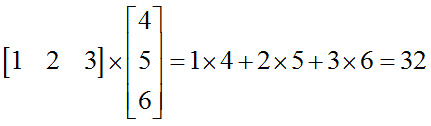

#### 代码5-2：取最大值索引——tf.argmax
该函数的作用返回数组内最大值对应的索引，这个函数在处理数据集分类标签的时候很常用，用于将“one hot”标签转化为正常标签。

In [ ]:
print(tf.argmax([1,0,0,8,6]))  

#### 代码5-3：扩张维度——tf.expand_dims
该函数的作用是在输入的tensor中增加一个维度。

In [ ]:
import tensorflow as tf

a=tf.constant([[1,2],[3,4],[5,6]])
b=tf.expand_dims(a,0)   #在tensor中增加一个维度，0表示需要添加维度的下标为0
c=tf.expand_dims(a,1)   #在tensor中增加一个维度，1表示需要添加维度的下标为1

print(a.shape,b.shape,c.shape)
print(a,b,c)

【补充说明】看Tensor的维度的时候，从括号外，一层一层向里面看，看里面同级的元素有多少个，这层形状的维度就是多少。
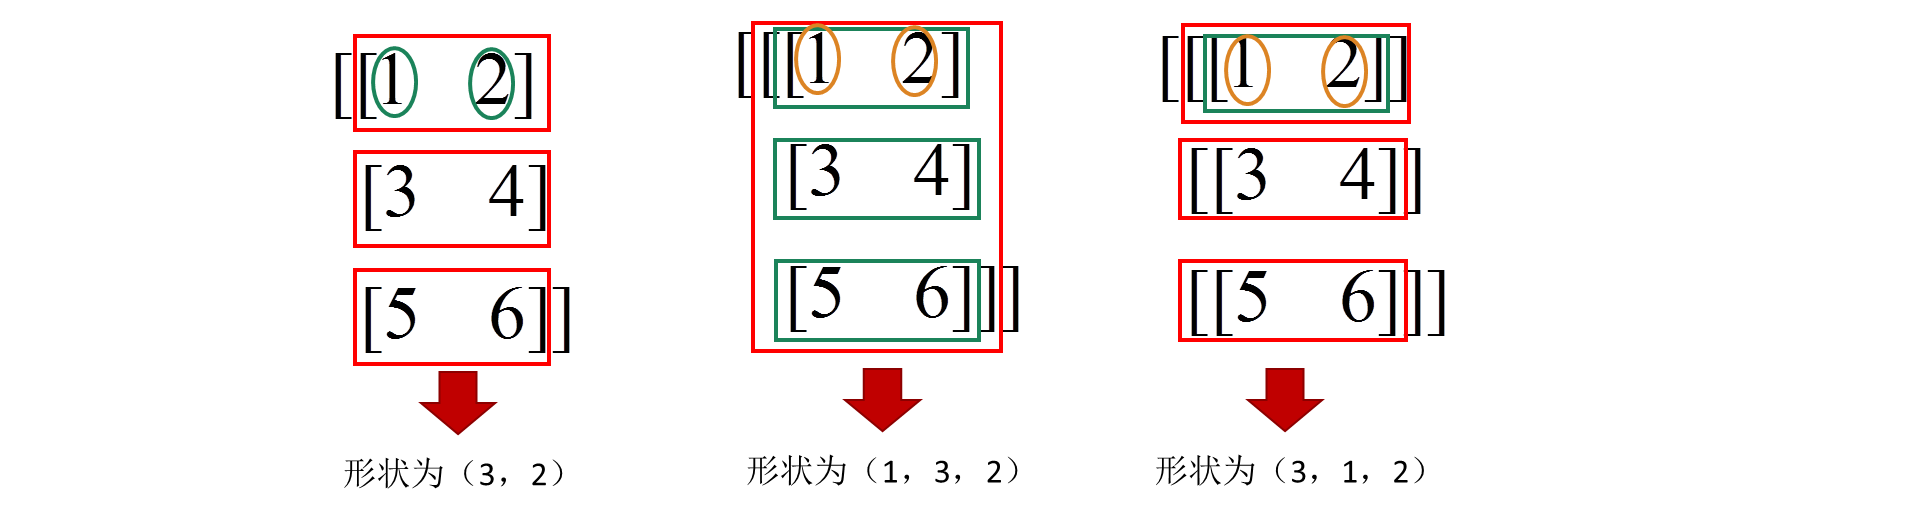

#### 代码5-4：张量拼接——tf.concat
该函数的作用是将多个Tensor在同一维度上进行拼接，可以通过参数指定是按照哪个维度拼接。这份函数在RNN中很常用，用于将多个输入拼接为一个大的向量。

In [ ]:
import tensorflow as tf
a=[[1,2,3],[4,5,6],[7,8,9]]
b=[[2,3,4],[5,6,7],[8,9,10]]
x=tf.concat([a,b],axis=0)  #按照维度0拼接，也就是添加在第一个方括号内
x
#x=[[1,2,3],[4,5,6],[7,8,9],[2,3,4],[5,6,7],[8,9,10]]

In [ ]:
y=tf.concat([a,b],axis=1) #按照维度1拼接，也就是添加在第二个方括号内
y

#### 代码5-5：形状变换——tf.reshape
形式：tf.reshape(tensor1,target_shape),序列中元素的顺序不变，形状按照指定的形状进行划分

In [ ]:
import tensorflow as tf
a=tf.Variable([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
print(a.shape)
b=tf.reshape(a,[6,2])
print(a)
print(b)

### 6、常量和变量
#### （1）常量——tf.constant
#### 代码6-1：常量的定义

In [ ]:
import tensorflow as tf
a=2.0
b=tf.constant(2.0)
print(a)
print(b)

#### （2）变量——tf.Variable

与普通张量一样，变量同样具有**形状、类型和值**三种属性。使用变量需要有一个**初始化**过程，可以通过在 tf.Variable() 中指定 initial_value 参数来指定初始值。变量与普通张量的一个重要区别是其默认**能够**被 TensorFlow 的**自动求导**机制所求导，因此往往被用于定义机器学习**模型的参数**。
#### 代码6-2：变量的定义——直接赋值初始化

In [ ]:
import tensorflow as tf
a1=tf.Variable(2)  #直接给变量赋值初始化
a2=tf.Variable([1,2,3])
a3=tf.Variable(initial_value=3.)  #通过initial_value显示的赋值初始化
a1,a2,a3

除了上述直接赋值的初始化方法，变量还有一些其他更复杂的初始化方法。

- tf.zeros
- tf.zeros_like
- tf.ones
- tf.ones_like
- tf.fill
- tf.random.normal
- tf.random.truncated_normal
- tf.random.uniform

#### 代码6-3 变量的初始化方法——指定形状和值

In [ ]:
import tensorflow as tf
a=tf.Variable(tf.zeros([2,1]))  #初始化为0,[2,1]为张量的形状
b=tf.Variable(tf.zeros_like(a)) #返回一个和给定tensor同样shape的tensor，其中的元素全部置0
c=tf.Variable(tf.ones([2,1]))  #初始化为0,[2,1]为张量的形状
d=tf.Variable(tf.ones_like(a)) #返回一个和给定tensor同样shape的tensor，其中的元素全部置0
e=tf.fill([2,3],4)  #给定一个shape，返回一个tensor，tensor中的元素全部置为指定数值

print(a)
print('\n',b)
print('\n',c)
print('\n',d)
print('\n',e)

#### 代码6-4：正态分布初始化——tf.random.normal

tf.random.normal(
    shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None
)

参数：

- shape: 输出张量的形状，**必选**
- mean: 正态分布的均值，默认为0
- stddev: 正态分布的标准差，默认为1.0
- dtype: 输出的类型，默认为tf.float32
- seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
- name: 操作的名称

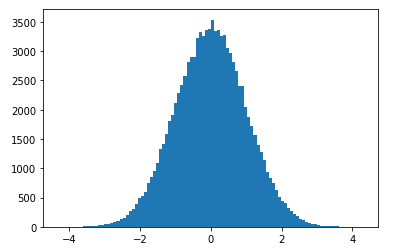
<center>标准正态分布示意图</center>

In [ ]:
import tensorflow as tf

a=tf.Variable(tf.random.normal(shape=[2,3],mean=2,stddev=2,seed=5)) #设定单个变量的随机种子

tf.random.set_seed(5)  #设定固定的随机种子（全局）
b=tf.Variable(tf.random.normal(shape=[2,3]))
print(a,'\n',b)

#### 代码6-5：截断正态分布——tf.random.truncated_normal
tf.random.truncated_normal(
    shape, mean=0.0, stddev=1.0, dtype=tf.dtypes.float32, seed=None, name=None
)

与正太分布的区别是tf.truncated_normal中如果x的取值在区间（μ-2σ，μ+2σ）之外则重新进行选择。这样保证了生成的值都在均值附近。

In [ ]:
import tensorflow as tf

a=tf.Variable(tf.random.truncated_normal(shape=[2,3]) )
b=tf.Variable(tf.random.truncated_normal(shape=[2,3],mean=2,stddev=2,seed=7))
print(a,'\n',b)

#### 代码6-6：随机均匀分布——tf.random.uniform

tf.random.uniform(
    shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None
)

参数：

- shape：一维整数张量或 Python 数组.输出张量的形状.
- minval：dtype 类型的 0-D 张量或 Python 值；生成的随机值范围的下限；默认为0.
- maxval：dtype 类型的 0-D 张量或 Python 值.要生成的随机值范围的上限.如果 dtype 是浮点,则默认为1 .
- dtype：输出的类型：float16、float32、float64、int32、orint64.
- seed：一个 Python 整数.用于为分布创建一个随机种子.查看 tf.set_random_seed 行为.
- name：操作的名称(可选).
返回：

用于填充随机均匀值的指定形状的张量.

In [ ]:
import tensorflow as tf

a=tf.Variable(tf.random.uniform([2,3]))
b=tf.Variable(tf.random.uniform(shape=[2,3],minval=1,maxval=2))
c=tf.Variable(tf.random.uniform([2,3],1,2))  #简写
print(a,'\n',b,'\n',c)

## TF2.x实例：线性回归 

下面我们以一个线性回归的模型为例，来熟悉一下TensorFlow2.0的基础使用。

#### 实例简介：准备一些基本符合y=2x+0.25的数据，作为训练数据集。然后涉及一个模型来拟合这批数据，训练模型使用BP算法。其中损失函数，使用MSE，公式如下：
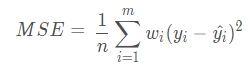

### 1、导入需要的库

这里使用numpy进行数值计算，使用matplotlib.pyplot进行可视化图像的绘制

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 2、准备数据集
使用NumPy生成一批基本符合y=2x的数据
#### 代码1-1: 生成数据

In [ ]:
train_X = np.float32(np.linspace(-1,1,100))   #在区间[-1,1）内产生100个数的等差数列，作为输入
train_Y = 2*train_X + np.random.randn(*train_X.shape)*0.3   #y = 2x+随机噪声
#显示输入数据
plt.plot(train_X,train_Y,'ro',label = 'original data')
plt.legend()
plt.show()

### 3、定义模型
输入和期望输出有了，还缺少参数和线性模型的计算方式，这里定义一个简单的线性模型。y = ax + b

In [ ]:
weight = tf.Variable(tf.random.normal([1],dtype=tf.float32,name='weight'))
bias = tf.Variable(tf.zeros([1],dtype=tf.float32,name='bias'))
varibles = [weight,bias]

def model(x):
    pred = tf.multiply(x,weight) + bias
    return pred

### 4、损失函数的定义
机器学习算法中，目标函数是整个模型优化学习的核心导向，需要最小化目标函数时，目标函数也被称为损失函数或代价函数。对于有监督学习任务，通常目标都是使得预测值尽可能的接近标签，即最小化目标函数，所以在神经网络中一般都将其称为损失函数。

损失函数的选取主要取决于学习任务的要求。例如，最常用的两个损失函数MSE与交叉熵就是分别用于回归与分类任务。我们这个实例是回归任务，这里使用MSE作为模型的损失函数，MSE函数公式如下：
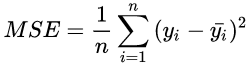
调用时，关键代码如下，
```python
    loss = tf.losses.MeanSquaredError()(model(x),y)

```

### 5、梯度计算更新——优化器
深度学习优化算法大概经历了 SGD -> SGDM -> NAG ->Adagrad -> Adadelta(RMSprop) -> Adam -> Nadam 这样的发展历程。在keras.optimizers子模块中，它们基本上都有对应的类的实现。
- SGD, 默认参数为纯SGD, 设置momentum参数不为0实际上变成SGDM, 考虑了一阶动量, 设置 nesterov为True后变成NAG，即 Nesterov Acceleration Gradient，在计算梯度时计算的是向前走一步所在位置的梯度。
- Adagrad, 考虑了二阶动量，对于不同的参数有不同的学习率，即自适应学习率。缺点是学习率单调下降，可能后期学习速率过慢乃至提前停止学习。
- RMSprop, 考虑了二阶动量，对于不同的参数有不同的学习率，即自适应学习率，对Adagrad进行了优化，通过指数平滑只考虑一定窗口内的二阶动量。
- Adadelta, 考虑了二阶动量，与RMSprop类似，但是更加复杂一些，自适应性更强。
- Adam, 同时考虑了一阶动量和二阶动量，可以看成RMSprop上进一步考虑了Momentum。
- Nadam, 在Adam基础上进一步考虑了 Nesterov Acceleration。

本例程中，我们使用最基础的随机梯度下降优化器进行优化。这里，我们使用 tf.keras.optimizers.SGD(learning_rate=5e-4) 声明了一个梯度下降 优化器 （Optimizer），其学习率为 5e-4。优化器可以帮助我们根据计算出的求导结果更新模型参数，从而最小化某个特定的损失函数。
```python
    optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)

```

### 6、更新权重的关键代码

上文已经定义了优化器，那接下来，我们要使用定义的优化器最小化损失值了。过程中需要进行如下关键操作：
- 使用 tape.gradient(ys, xs) 自动计算梯度；
- 使用 optimizer.apply_gradients(grads_and_vars) 自动更新模型参数。

注：这里ys为因变量，也就是loss，xs代表自变量，如weight和bias等参数。grads_and_vars表示梯度和参数示例关键代码如下：


```python
    with tf.GradientTape() as tape:
        loss = tf.losses.MeanSquaredError()(model(x),y)
    grads = tape.gradient(loss,varibles)
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))
```
- **tape.gradient:**tape.gradient求解梯度，需要传入两个参数：损失值和参数，一个是因变量，一个是自变量。
- **optimizer.apply_gradients：** 更新梯度，依然传入两个参数，梯度和变量。变量将会按照w_new = w-lr.grads的方式进行参数的更新。

具体而言，grads_and_vars这里需要传入一个 Python 列表（List），列表中的每个元素是一个 （变量的偏导数，变量） 对。比如上例中需要传入的参数是[(grad_a, a), (grad_b, b)] 。我们通过 grads = tape.gradient(loss, variables) 求出 tape 中记录的 loss 关于 variables = [a, b] 中每个变量的偏导数，也就是 grads = [grad_a, grad_b]，再使用 Python 的 zip() 函数将 grads = [grad_a, grad_b] 和 variables = [a, b] 拼装在一起，就可以组合出所需的参数了。

### 7、完整代码

#### 代码7-1: 基础代码
- 使用了50条训练数据
- 学习率为1e-1（即0.1）
- 使用了Adam算法
- 训练了一个epoch
- weught初始化使用随机正太分布初始化，bias使用0值初始化

#### 代码7-1：线性回归代码

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# input_x = np.random.rand(100)  #从0到1中取100个均匀分布的样本值为x
# input_y = 2*input_x+0.25

input_x = np.float32(np.linspace(-1,1,100))   #在区间[-1,1）内产生100个数的等差数列，作为输入
input_y = 2*input_x + np.random.randn(*input_x.shape)*0.3   #y = 2x+随机噪声

weight = tf.Variable(1.,dtype=tf.float32,name='weight')
bias = tf.Variable(1.,dtype=tf.float32,name='bias')

def model(x):
    pred = tf.multiply(x,weight) + bias
    return pred

step=0
opt=tf.optimizers.Adam(1e-1) #选择优化器，是一种梯度下降的方法

for x,y in zip(input_x,input_y):
    x = np.reshape(x,[1])
    y = np.reshape(y,[1])
    with tf.GradientTape() as tape:
        loss = tf.losses.MeanSquaredError()(model(x),y)
#         loss = tf.reduce_mean(tf.pow((y - pred),2))
    grads=tape.gradient(loss,[weight,bias])
    opt.apply_gradients(zip(grads,[weight,bias]))
    print("Step：",step,"Traing Loss：",loss.numpy())
    plt.plot(input_x,input_y,'ro',label = 'original data')
    plt.plot(input_x,model(input_x),label = 'predicted value')
    plt.plot(input_x,2*input_x,label = 'y = 2x + 0.25')
    plt.legend()
    plt.show()
    
# plt.plot(input_x,input_y,'ro',label = 'original data')
# plt.plot(input_x,model(input_x),label = 'predicted value')
# plt.plot(input_x,2*input_x+0.25,label = 'y = 2x + 0.25')
# plt.legend()
# plt.show()
print(weight)
print(bias)